<a href="https://colab.research.google.com/github/ipavlopoulos/proverbs.gr/blob/main/analysis/error_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Error Analysis of Greek Proverb Geographical Attribution Classifiers

In [2]:
import pandas as pd
preds = pd.read_csv('https://raw.githubusercontent.com/greek-proverb-atlas/proverbs.gr/main/analysis/classification_seed2023.csv', index_col=0)
preds.sample(3)

,aa,lr,svm,knn,rf,text,gold,bert
105383,East Thrace,Αρκαδία,Μακεδονία,Ανατολική Θράκη,Νάξος,Αντάρα και σιαντάρα κατσιαχούρχουρη γαϊδάρα!,Αρκαδία,Αχαΐα
783,Kefalinia,Λέσβος,Κύπρος,Λέσβος,Λέσβος,Λόγια ναστρατίνκα,Λέσβος,Μικρά Ασία
70908,Maced.,Μακεδονία,Μακεδονία,Σκύρος,Αιτωλία,Σαν βριμέν' γάτα περπατεί,Αιτωλία,Ιωάννινα


## Areas with texts where BERT and LR agree at most

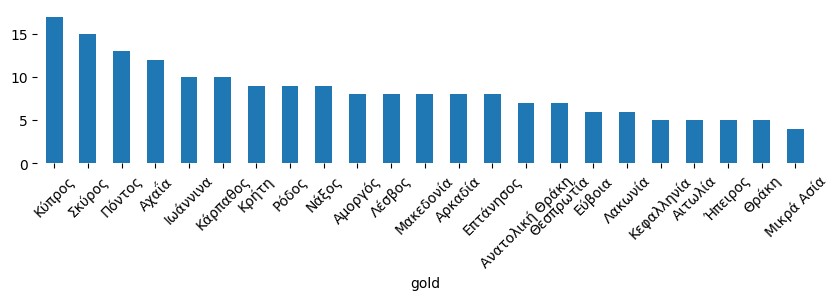

In [5]:
# where the two agree ==> areas they perform well
preds[preds.lr==preds.bert].gold.value_counts().plot.bar(figsize=(10,2), rot=45);

## Areas with texts for which BERT and LR disagree at most

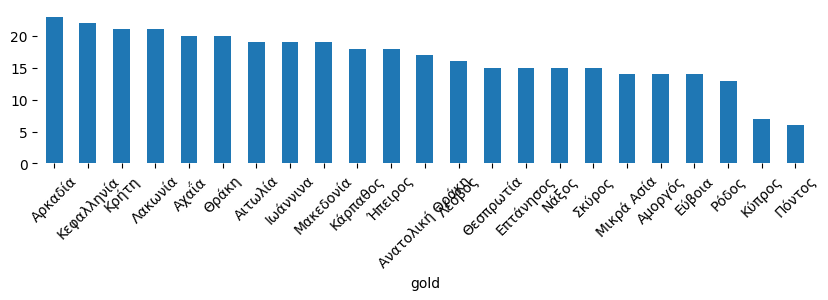

In [9]:
# where the two disagree ==> areas they underperform
preds[preds.lr!=preds.bert].gold.value_counts().plot.bar(figsize=(10,2), rot=45);
sns.despine(left=True, bottom=True)

* Focusing on areas where BERT is correct but LR is not

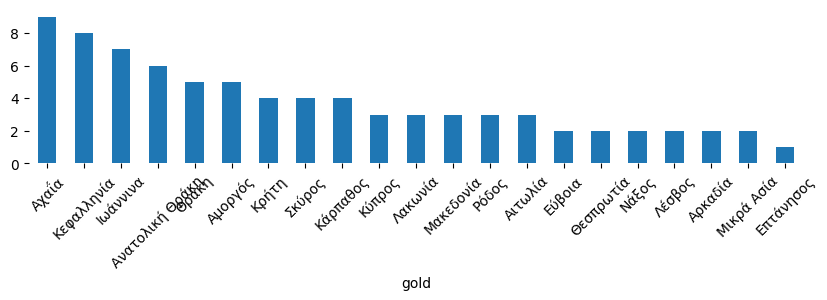

In [7]:
# where BERT is right but LR is not
preds[(preds.bert==preds.gold)&(preds.lr!=preds.bert)].gold.value_counts().plot.bar(figsize=(10,2), rot=45);
sns.despine(left=True, bottom=True)

* Focusing on areas where LR is correct but BERT is not

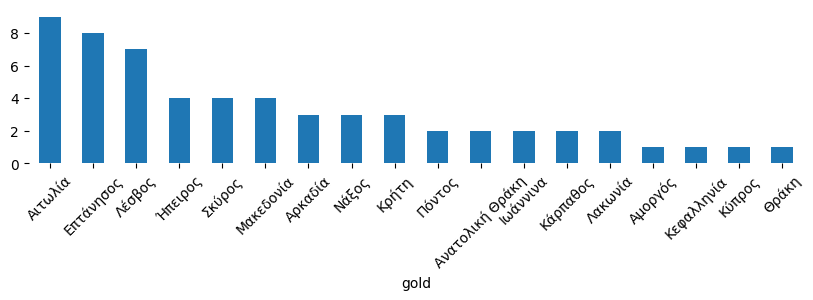

In [11]:
# where LR is right and disagrees with BERT
preds[(preds.lr==preds.gold)&(preds.lr!=preds.bert)].gold.value_counts().plot.bar(figsize=(10,2), rot=45);
sns.despine(left=True, bottom=True)

* Exploring what other ML models say

In [12]:
print(f'In {preds[(preds.lr==preds.gold)&(preds.lr!=preds.bert)].apply(lambda x: len(set(x[1:5]))==1, 1).mean():.2f}% of the instances where LR was right the other ML models agree')
print(f'In {preds[(preds.bert==preds.gold)&(preds.lr!=preds.bert)].apply(lambda x: len(set(x[1:5]))==1, 1).mean():.2f}% of the instances where BERT was right the other ML models agree')

In 0.25% of the instances where LR was right the other ML models agree
In 0.05% of the instances where BERT was right the other ML models agree
